### coordinate transform

In [2]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
a1 = np.array([0,0])
a2 = np.array([1,0])
a3 = np.array([0,-1])
a4 = np.array([1,-1])

# g1 = np.array([1, 1]) / np.sqrt(2)
# g2 = np.array([-1, 1]) / np.sqrt(2)
g1 = np.array([1,0.75])
g2 = np.array([-1,0.75])

A = np.vstack([g1, g2]).T
Ainv = np.linalg.inv(A)
Ainv

array([[ 0.5       ,  0.66666667],
       [-0.5       ,  0.66666667]])

In [5]:
a1 = np.array([0,0])
a2 = np.array([1,0])
a3 = np.array([0,-1])
a4 = np.array([1,-1])

# g1 = np.array([1, 1]) / np.sqrt(2)
# g2 = np.array([-1, 1]) / np.sqrt(2)
g1 = np.array([1,0.75])
g2 = np.array([-1,0.75])

A = np.vstack([g1, g2]).T
print(A)

Ainv = np.linalg.inv(A)
print(Ainv.dot(a1))
print(Ainv.dot(a2))
print(Ainv.dot(a3))
print(Ainv.dot(a4))

[[ 1.   -1.  ]
 [ 0.75  0.75]]
[0. 0.]
[ 0.5 -0.5]
[-0.66666667 -0.66666667]
[-0.16666667 -1.16666667]


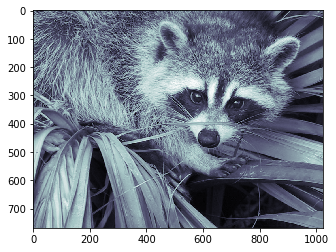

In [6]:
import scipy.misc

f = sp.misc.face(gray=True)
plt.imshow(f, cmap=mpl.cm.bone)
plt.grid(False)
plt.show()

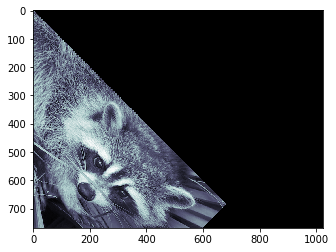

In [7]:
import scipy.ndimage

f1 = sp.ndimage.affine_transform(f, A)
plt.imshow(f1, cmap=mpl.cm.bone)
plt.grid(False)
plt.show()

In [8]:

g1 = np.array([1, -0.75])
g2 = np.array([1, 0.75])

B = np.vstack([g1, g2]).T
print(B)
Binv = np.linalg.inv(B)
Binv

[[ 1.    1.  ]
 [-0.75  0.75]]


array([[ 0.5       , -0.66666667],
       [ 0.5       ,  0.66666667]])

[[0 1]
 [1 0]]
[0. 0.]
[0. 1.]
[-1.  0.]
[-1.  1.]


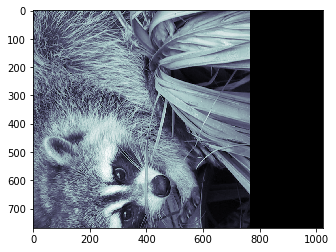

In [9]:
# 문제 변형 2 : 

g1 = np.array([0, 1])
g2 = np.array([1, 0])

B = np.vstack([g1, g2]).T
print(B)
Binv = np.linalg.inv(B)

print(Binv.dot(a1))
print(Binv.dot(a2))
print(Binv.dot(a3))
print(Binv.dot(a4))

f1 = sp.ndimage.affine_transform(f, B)
plt.imshow(f1, cmap=mpl.cm.bone)
plt.grid(False)
plt.show()

[[  1.    0.    0. ]
 [ -0.5   1.  300. ]]


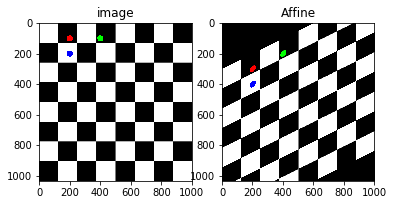

In [12]:
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('chessboard.png')
rows, cols, ch = img.shape

pts1 = np.float32([[200,100],[400,100],[200,200]]) # a
pts2 = np.float32([[200,300],[400,200],[200,400]]) # a'

cv2.circle(img, (200,100), 20, (255,0,0),-1)
cv2.circle(img, (400,100), 20, (0,255,0),-1)
cv2.circle(img, (200,200), 20, (0,0,255),-1)

M = cv2.getAffineTransform(pts1, pts2) # M은 A inverse를 구해준다(transform matrix) # 전, 후
print(M)
dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

원근감 변환의 경우 3x3 변형 행렬이 필요합니다. 직선은 변환 후에도 직선으로 유지됩니다. 이 변환 행렬을 찾으려면 입력 이미지와 출력 이미지의 해당 점에 4 점이 필요합니다. 이 4 점 중 3 점은 동일 선상이 아니어야합니다. 그런 다음 변환 행렬은 cv2.getPerspectiveTransform 함수로 찾을 수 있습니다. 그런 다음이 3x3 변환 행렬로 cv2.warpPerspective를 적용하십시오.

[[ 9.74732070e-01  8.12276725e-02 -5.98647946e+01]
 [ 4.11508573e-02  1.05092959e+00 -7.06148711e+01]
 [ 1.37169524e-04  4.22343250e-04  1.00000000e+00]]


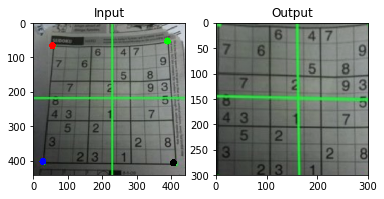

In [13]:
img = cv2.imread('sudokusmall.png')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[388,52],[28,401],[405,401]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2) # 
print(M)
dst = cv2.warpPerspective(img,M,(300,300))

cv2.circle(img, (56,65), 10, (255,0,0),-1)
cv2.circle(img, (388,52), 10, (0,255,0),-1)
cv2.circle(img, (28,401), 10, (0,0,255),-1)
cv2.circle(img, (405,405), 10, (0,0,0),-1)

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

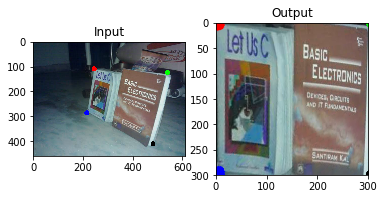

In [14]:
img = cv2.imread('right.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[245, 110],[538,125],[215,286],[480,410]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

cv2.circle(img, (245, 110), 10, (255,0,0),-1)
cv2.circle(img, (538,125), 10, (0,255,0),-1)
cv2.circle(img, (215,286), 10, (0,0,255),-1)
cv2.circle(img, (480,410), 10, (0,0,0),-1)

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()